In [365]:
import string
from langdetect import detect
import lyricsgenius
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from adjustText import adjust_text
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from scrape_genius import get_lyrics_from_dataframe
import re

In [366]:
merged_df = pd.read_csv('genius_grammy.csv')

In [367]:
merged_df.dropna(inplace=True)

In [368]:
merged_df.title.nunique()

343

In [369]:
import re

# Define regex pattern to match section headers and instances of the word "lyric"
pattern = r"\[(Chorus|choru|Intro|Verse \d+|Bridge|Outro)\]|\(SINGLE\)|[Ll][Yy][Rr][Ii][Cc][Ss]:?|\blyrics\b"

# Apply regex pattern to lyrics column in data frame
merged_df['lyrics'] = merged_df['lyrics'].apply(lambda x: re.sub(pattern, "", x))

# Print updated data frame
print(merged_df)


                               title                           artist  winner  \
0    Nel Blu Dipinto Di Blu (Volare)                 Domenico Modugno       1   
1               Catch A Falling Star                       Perry Como       0   
2                Witchcraft (Single)                    Frank Sinatra       0   
3                  The Chipmunk Song  David Seville And The Chipmunks       0   
4                     Fever (Single)                        Peggy Lee       0   
..                               ...                              ...     ...   
343                            Woman                         Doja Cat       0   
344           You And Me On The Rock  Brandi Carlile Featuring Lucius       0   
345            Good Morning Gorgeous                    Mary J. Blige       0   
346                       Easy On Me                            Adele       0   
347               Don't Shut Me Down                             ABBA       0   

     year  \
0    1958   
1

In [370]:
merged_df

,title,artist,winner,year,lyrics
0,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,1,1958,"Nel blu dipinto di blu (Volare) [Testo di ""Nel blu dipinto di blu (Volare)""]\n\n[Strofa 1]\nPens..."
1,Catch A Falling Star,Perry Como,0,1958,Catch a Falling Star \nCatch a falling star and put it in your pocket\nNever let it fade away\nC...
2,Witchcraft (Single),Frank Sinatra,0,1958,"Sweetest Maleficia [Gilles de Rais:]\nI conjure you\nBarron, Satan, Beelzebub\nBy the Father, th..."
3,The Chipmunk Song,David Seville And The Chipmunks,0,1958,"The Chipmunk song [Dave:] Alright you Chipmunks, Ready to sing your song?\n[Alvin:] I'd say we a..."
4,Fever (Single),Peggy Lee,0,1958,Jaden Smith Discography 2012\nFlame (Just Cuz) \nGive It To Em' \nThe Coolest \nCool Tape Vol. 1...
...,...,...,...,...,...
343,Woman,Doja Cat,0,2022,TranslationsTürkçeEspañolPortuguêsItalianoΕλληνικάDeutschFrançaisفارسیPerfect \nI found a love f...
344,You And Me On The Rock,Brandi Carlile Featuring Lucius,0,2022,You and Me On The Rock \nThey build wooden houses on frozen ponds\nIn the summertime when the wa...
345,Good Morning Gorgeous,Mary J. Blige,0,2022,"Good Morning Gorgeous \nOoh\nOoh, ooh, ohh, ah\nOoh, ooh\n\n\nIt's so hard just holding on\nAin'..."
346,Easy On Me,Adele,0,2022,TranslationsTürkçeไทย / Phasa ThaiSvenskaEspañolHrvatskiРусскийPortuguês한국어日本語ItalianoMagyarΕλλη...


In [371]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Stem the words (optional)
    porter = nltk.PorterStemmer()
    stemmed_tokens = [porter.stem(token) for token in filtered_tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

merged_df['preprocessed_lyrics'] = merged_df['lyrics'].apply(preprocess_text)


In [372]:
# Identify language of each lyric using langdetect
merged_df['language'] = merged_df['preprocessed_lyrics'].apply(detect)

# Filter out non-English lyrics
df_english = merged_df[merged_df['language'] == 'en']


In [373]:
df_english.dropna(axis=1, inplace=True)

if df_english['preprocessed_lyrics'].dtype != 'object':
    df_english['preprocessed_lyrics'] = df_english['preprocessed_lyrics'].astype(str)

/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93901/2351279597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english.dropna(axis=1, inplace=True)


In [374]:
df_english

,title,artist,winner,year,lyrics,preprocessed_lyrics,language
1,Catch A Falling Star,Perry Como,0,1958,Catch a Falling Star \nCatch a falling star and put it in your pocket\nNever let it fade away\nC...,catch fall star catch fall star put pocket never let fade away catch fall star put pocket save r...,en
2,Witchcraft (Single),Frank Sinatra,0,1958,"Sweetest Maleficia [Gilles de Rais:]\nI conjure you\nBarron, Satan, Beelzebub\nBy the Father, th...","sweetest maleficia [ gill de rai : ] conjur barron , satan , beelzebub father , son , holi spiri...",en
3,The Chipmunk Song,David Seville And The Chipmunks,0,1958,"The Chipmunk song [Dave:] Alright you Chipmunks, Ready to sing your song?\n[Alvin:] I'd say we a...","chipmunk song [ dave : ] alright chipmunk , readi sing song ? [ alvin : ] 'd say [ theodor : ] y...",en
4,Fever (Single),Peggy Lee,0,1958,Jaden Smith Discography 2012\nFlame (Just Cuz) \nGive It To Em' \nThe Coolest \nCool Tape Vol. 1...,jaden smith discographi 2012 flame ( cuz ) give em ' coolest cool tape vol . 1 : cool cafe ( mix...,en
5,Mack The Knife,Bobby Darin,1,1959,"Mack the Knife Oh the shark, babe, has such teeth, dear\nAnd he shows them pearly white\nJust a ...","mack knife oh shark , babe , teeth , dear show pearli white jackknif old macheath , babe keep ou...",en
...,...,...,...,...,...,...,...
343,Woman,Doja Cat,0,2022,TranslationsTürkçeEspañolPortuguêsItalianoΕλληνικάDeutschFrançaisفارسیPerfect \nI found a love f...,"translationstürkçeespañolportuguêsitalianoελληνικάdeutschfrançaisفارسیperfect found love oh , da...",en
344,You And Me On The Rock,Brandi Carlile Featuring Lucius,0,2022,You and Me On The Rock \nThey build wooden houses on frozen ponds\nIn the summertime when the wa...,rock build wooden hous frozen pond summertim water 's gone diagon line rolled-out lawn sage alwa...,en
345,Good Morning Gorgeous,Mary J. Blige,0,2022,"Good Morning Gorgeous \nOoh\nOoh, ooh, ohh, ah\nOoh, ooh\n\n\nIt's so hard just holding on\nAin'...","good morn gorgeou ooh ooh , ooh , ohh , ah ooh , ooh 's hard hold ai n't even pick phone 's hard...",en
346,Easy On Me,Adele,0,2022,TranslationsTürkçeไทย / Phasa ThaiSvenskaEspañolHrvatskiРусскийPortuguês한국어日本語ItalianoMagyarΕλλη...,translationstürkçeไทย / phasa thaisvenskaespañolhrvatskiрусскийportuguês한국어日本語italianomagyarελλη...,en


In [375]:
def read_lexicon(filename):
    word_sentiments = {}

    # Parse lexicon file
    with open(filename, 'r') as f:
        for line in f:
            # Ignore blank lines
            if line.strip():
                word, sentiment, value = line.split()
                if value == '1':
                    # Add sentiment to dictionary
                    cur_list = word_sentiments.get(word, [])
                    cur_list.append(sentiment)
                    word_sentiments[word] = cur_list

    return word_sentiments

In [376]:
def get_sentiment_percentages(track_df, sentiment):
    sentiment_pcts = []

    # Parse tracks
    for title in track_df.index.values:
        num_sentiment_words = 0
        all_words = str(track_df.loc[title]['preprocessed_lyrics']).split()

        # Parse words in lyrics
        for word in all_words:
            if sentiment in word_sentiments_dict.get(word, []):
                num_sentiment_words += 1

        sentiment_pcts.append(num_sentiment_words/len(all_words))

    return pd.DataFrame(data=sentiment_pcts, index=track_df.index.values, columns=[sentiment + '_pct'])


In [377]:
#Initialize sentiment dictionary and track dataframe
word_sentiments_dict = read_lexicon('lexicon.txt')

#Generate sentiment percentages based on NRC Lexicon sentiments
sentiments = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
for sentiment  in sentiments:
    sentiment_df = get_sentiment_percentages(df_english, sentiment)
    df_english = df_english.join(sentiment_df)

In [378]:
# Calculate the weighted average of the sentiment percentages for each row in the DataFrame
weights = [0.1, 0.5, 0.1, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1]
sentiments = ['negative_pct',
              'sadness_pct',
              'disgust_pct',
              'fear_pct',
              'anticipation_pct',
              'joy_pct', 
              'surprise_pct',
              'trust_pct',
              'anger_pct']
df_english[sentiments] = df_english[sentiments].replace(0, 0.000001) # take care of 0s
df_english['gloom_index'] = (df_english[sentiments] * weights).sum(axis=1)

# Rescale the 'gloom_index' column to a range of 0 to 100
max_gloom_value = df_english['gloom_index'].max()
min_gloom_value = df_english['gloom_index'].min()
df_english['gloom_index'] = (df_english['gloom_index'] - min_gloom_value) / (max_gloom_value - min_gloom_value) * 100

# Sort the DataFrame by the 'gloom_index' column in descending order
df_english.sort_values(by='gloom_index', ascending=False, inplace=True)



In [379]:
df_english[sentiments]

,negative_pct,sadness_pct,disgust_pct,fear_pct,anticipation_pct,joy_pct,surprise_pct,trust_pct,anger_pct
178,0.117647,0.076923,0.052036,0.095023,0.067873,0.049774,0.033937,0.063348,0.047511
311,0.097938,0.097938,0.082474,0.082474,0.030928,0.025773,0.015464,0.025773,0.082474
241,0.113208,0.094340,0.061321,0.070755,0.061321,0.042453,0.014151,0.047170,0.061321
83,0.110345,0.089655,0.027586,0.089655,0.055172,0.041379,0.013793,0.048276,0.020690
252,0.101818,0.065455,0.021818,0.065455,0.069091,0.047273,0.069091,0.054545,0.083636
...,...,...,...,...,...,...,...,...,...
328,0.024436,0.000001,0.000001,0.003759,0.011278,0.015038,0.007519,0.015038,0.000001
111,0.031746,0.000001,0.000001,0.000001,0.023810,0.015873,0.000001,0.007937,0.000001
92,0.003367,0.003367,0.003367,0.003367,0.003367,0.000001,0.003367,0.003367,0.003367
160,0.006536,0.000001,0.000001,0.000001,0.006536,0.006536,0.000001,0.013072,0.000001


In [380]:
df_english.drop_duplicates(['title','artist', 'year'], inplace=True)

In [381]:
df_english.sort_values(['gloom_index'], ascending=False)

,title,artist,winner,year,lyrics,preprocessed_lyrics,language,anger_pct,anticipation_pct,disgust_pct,fear_pct,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index
178,If I Ever Lose My Faith In You (Single),Sting,0,1993,Sorrow (syrup rmx) Yea\nUh huh\nAbstract Art\nFirst thing we putting out this shit 2015\nRecorde...,sorrow ( syrup rmx ) yea uh huh abstract art first thing put shit 2015 record shit nigga 's base...,en,0.047511,0.067873,0.052036,0.095023,0.049774,0.117647,0.088235,0.076923,0.033937,0.063348,100.000000
311,Bad Guy,Billie Eilish,1,2019,TranslationsHrvatskiTürkçeSvenskaEspañolРусскийRomânăPortuguêsPolskiItalianoHebrewDeutschFrançai...,translationshrvatskitürkçesvenskaespañolрусскийromânăportuguêspolskiitalianohebrewdeutschfrançai...,en,0.082474,0.030928,0.082474,0.082474,0.025773,0.097938,0.025773,0.097938,0.015464,0.025773,97.722619
241,Not Ready To Make Nice,Dixie Chicks,1,2006,"Not Ready to Make Nice \nForgive, sounds good\nForget, I'm not sure I could\nThey say time heals...","readi make nice forgiv , sound good forget , 'm sure could say time heal everyth 'm still wait '...",en,0.061321,0.061321,0.061321,0.070755,0.042453,0.113208,0.047170,0.094340,0.014151,0.047170,94.855395
83,Help Me (Single),Joni Mitchell,0,1974,Lilith \nSeptember\nDont rain on me\nDont throw me back in the ocean of tears\nIm drowning\nIts ...,lilith septemb dont rain dont throw back ocean tear im drown hard breath 'm knee oh lord hear 'm...,en,0.020690,0.055172,0.027586,0.089655,0.041379,0.110345,0.055172,0.089655,0.013793,0.048276,93.863111
252,Paper Planes,M.I.A,0,2008,"Paper Planes \nI fly like paper, get high like planes\nIf you catch me at the border I got visas...","paper plane fli like paper , get high like plane catch border got visa name come around , make '...",en,0.083636,0.069091,0.021818,0.065455,0.047273,0.101818,0.061818,0.065455,0.069091,0.054545,85.060149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,Leave The Door Open,Silk Sonic,1,2021,TranslationsTürkçeEnglishРусскийPortuguês日本語ItalianoDeutschNederlandsLeave The Door Open [Intro:...,translationstürkçeenglishрусскийportuguês日本語italianodeutschnederlandsleav door open [ intro : br...,en,0.000001,0.011278,0.000001,0.003759,0.015038,0.024436,0.022556,0.000001,0.007519,0.015038,5.681638
111,Sailing,Christopher Cross,1,1980,"Sailing \nWell, it's not far down to paradise\nAt least it's not for me\nAnd if the wind is righ...","sail well , 's far paradis least 's wind right sail away find tranquil oh , canva miracl wait se...",en,0.000001,0.023810,0.000001,0.000001,0.015873,0.031746,0.039683,0.000001,0.000001,0.007937,4.680534
92,If You Leave Me Now (Single),Chicago,0,1976,"TranslationsTürkçeIf You Leave Me Now [Intro: Charlie Puth & Boyz II Men]\nOh, whoa, oh\nOh-oh-o...","translationstürkçeif leav [ intro : charli puth & boyz ii men ] oh , whoa , oh oh-oh-oh , whoa a...",en,0.003367,0.003367,0.003367,0.003367,0.000001,0.003367,0.006734,0.003367,0.003367,0.003367,2.675444
160,She Drives Me Crazy (Single),Fine Young Cannibals,0,1989,She Drives Me Crazy (single remix) I can't stop\nThe way I feel\nThings you do\nDon't seem real\...,drive crazi ( singl remix ) ca n't stop way feel thing n't seem real tell got mind 'caus 're run...,en,0.000001,0.006536,0.000001,0.000001,0.006536,0.006536,0.019608,0.000001,0.000001,0.013072,1.010343


In [382]:
# clean 0 gloom index
df_english.to_csv('english_df.csv', index=False)
df_english

,title,artist,winner,year,lyrics,preprocessed_lyrics,language,anger_pct,anticipation_pct,disgust_pct,fear_pct,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index
178,If I Ever Lose My Faith In You (Single),Sting,0,1993,Sorrow (syrup rmx) Yea\nUh huh\nAbstract Art\nFirst thing we putting out this shit 2015\nRecorde...,sorrow ( syrup rmx ) yea uh huh abstract art first thing put shit 2015 record shit nigga 's base...,en,0.047511,0.067873,0.052036,0.095023,0.049774,0.117647,0.088235,0.076923,0.033937,0.063348,100.000000
311,Bad Guy,Billie Eilish,1,2019,TranslationsHrvatskiTürkçeSvenskaEspañolРусскийRomânăPortuguêsPolskiItalianoHebrewDeutschFrançai...,translationshrvatskitürkçesvenskaespañolрусскийromânăportuguêspolskiitalianohebrewdeutschfrançai...,en,0.082474,0.030928,0.082474,0.082474,0.025773,0.097938,0.025773,0.097938,0.015464,0.025773,97.722619
241,Not Ready To Make Nice,Dixie Chicks,1,2006,"Not Ready to Make Nice \nForgive, sounds good\nForget, I'm not sure I could\nThey say time heals...","readi make nice forgiv , sound good forget , 'm sure could say time heal everyth 'm still wait '...",en,0.061321,0.061321,0.061321,0.070755,0.042453,0.113208,0.047170,0.094340,0.014151,0.047170,94.855395
83,Help Me (Single),Joni Mitchell,0,1974,Lilith \nSeptember\nDont rain on me\nDont throw me back in the ocean of tears\nIm drowning\nIts ...,lilith septemb dont rain dont throw back ocean tear im drown hard breath 'm knee oh lord hear 'm...,en,0.020690,0.055172,0.027586,0.089655,0.041379,0.110345,0.055172,0.089655,0.013793,0.048276,93.863111
252,Paper Planes,M.I.A,0,2008,"Paper Planes \nI fly like paper, get high like planes\nIf you catch me at the border I got visas...","paper plane fli like paper , get high like plane catch border got visa name come around , make '...",en,0.083636,0.069091,0.021818,0.065455,0.047273,0.101818,0.061818,0.065455,0.069091,0.054545,85.060149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,Leave The Door Open,Silk Sonic,1,2021,TranslationsTürkçeEnglishРусскийPortuguês日本語ItalianoDeutschNederlandsLeave The Door Open [Intro:...,translationstürkçeenglishрусскийportuguês日本語italianodeutschnederlandsleav door open [ intro : br...,en,0.000001,0.011278,0.000001,0.003759,0.015038,0.024436,0.022556,0.000001,0.007519,0.015038,5.681638
111,Sailing,Christopher Cross,1,1980,"Sailing \nWell, it's not far down to paradise\nAt least it's not for me\nAnd if the wind is righ...","sail well , 's far paradis least 's wind right sail away find tranquil oh , canva miracl wait se...",en,0.000001,0.023810,0.000001,0.000001,0.015873,0.031746,0.039683,0.000001,0.000001,0.007937,4.680534
92,If You Leave Me Now (Single),Chicago,0,1976,"TranslationsTürkçeIf You Leave Me Now [Intro: Charlie Puth & Boyz II Men]\nOh, whoa, oh\nOh-oh-o...","translationstürkçeif leav [ intro : charli puth & boyz ii men ] oh , whoa , oh oh-oh-oh , whoa a...",en,0.003367,0.003367,0.003367,0.003367,0.000001,0.003367,0.006734,0.003367,0.003367,0.003367,2.675444
160,She Drives Me Crazy (Single),Fine Young Cannibals,0,1989,She Drives Me Crazy (single remix) I can't stop\nThe way I feel\nThings you do\nDon't seem real\...,drive crazi ( singl remix ) ca n't stop way feel thing n't seem real tell got mind 'caus 're run...,en,0.000001,0.006536,0.000001,0.000001,0.006536,0.006536,0.019608,0.000001,0.000001,0.013072,1.010343


<AxesSubplot:>

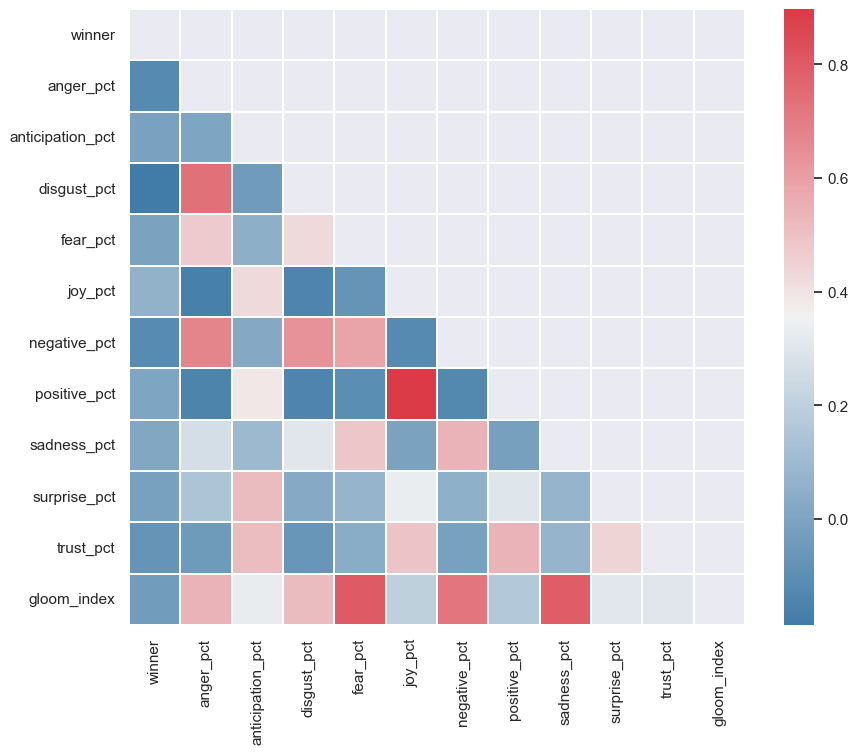

In [401]:
df_corr = df_english.drop(['title', 'artist', 'lyrics', 'preprocessed_lyrics', 'year', 'language'], axis=1)

sns.set_theme(style="dark")

corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.2) 
